# TITLE        : CO2 EMISSION PREDICTION
# AUTHOR   : OTTAH DANIEL C.
# MODEL     : LINEAR REGRESSION
# DATE        : 09/30/2023

## ABOUT THE PROJECT

#### This project focuses on building a simple linear regression model that predicts CO2 emmission in canada for light-duty vehicles. The model showed an accuracy of about (0.80) using R2 as the model evaluation metrics. 


## ABOUT THE DATASET


### This is a fuel consumption dataset which contains model-specific fuel consumption ratings and estimated carbon diovide emissions for new light-duty vehicles for retail sale in  Canada. Dataset source https://www.1keydata.com/datawarehousing/data-modeling-levels.html .

* MODELYEAR e.g. 2014
* MAKE e.g. Acura
* MODEL e.g. ILX
* VEHICLE CLASS e.g. SUV
* ENGINE SIZE e.g. 4.7
* CYLINDERS e.g 6
* TRANSMISSION e.g. A6
* FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
* FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
* FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
* CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

### IMPORTING LIBRARIES

In [54]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline


### READING THE DATA 

In [55]:
df = pd.read_csv(r"C:\Users\daniel\Documents\FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


### DATA EXPLORATION

In [56]:
# summarize the data
df.describe

<bound method NDFrame.describe of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTI

In [57]:
# To view the columns
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

### selecting few features to work on

In [58]:
dfc = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
dfc.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,8.5,9.9,196
1,2.4,4,9.6,11.2,221
2,1.5,4,5.9,6.0,136
3,3.5,6,11.1,12.7,255
4,3.5,6,10.6,12.1,244
5,3.5,6,10.0,11.9,230
6,3.5,6,10.1,11.8,232
7,3.7,6,11.1,12.8,255
8,3.7,6,11.6,13.4,267
9,2.4,4,9.2,10.6,212


#### Plots to review the relationship of each of this features with the Emmission

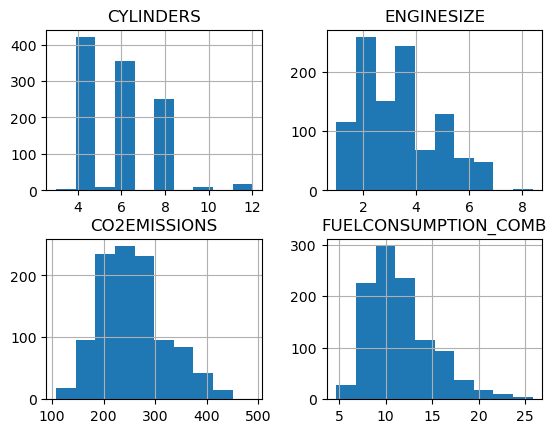

In [59]:
viz = dfc[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

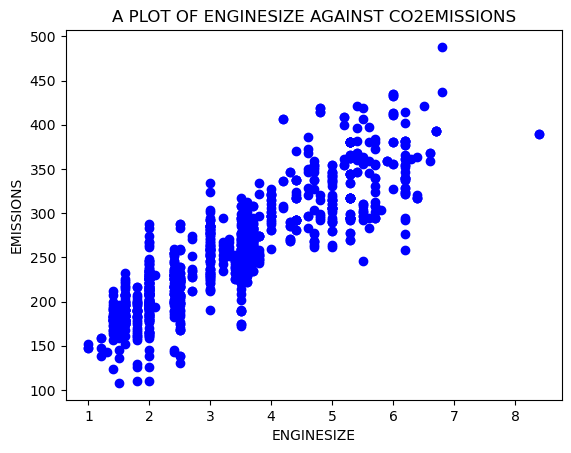

In [60]:
plt.scatter(dfc.ENGINESIZE,dfc.CO2EMISSIONS,color = 'blue' )
plt.title("A PLOT OF ENGINESIZE AGAINST CO2EMISSIONS")
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

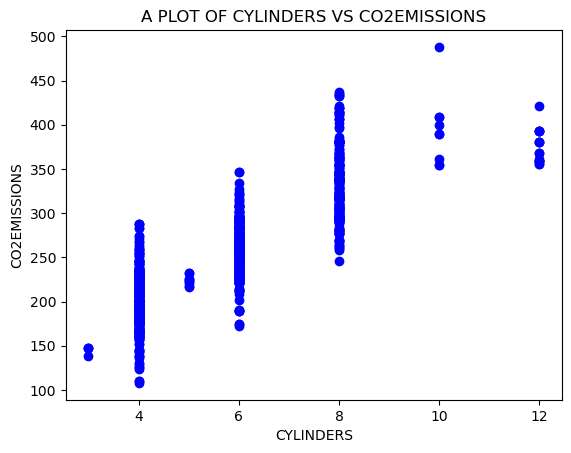

In [61]:
plt.scatter(dfc.CYLINDERS,dfc.CO2EMISSIONS, color = 'blue')
plt.title("A PLOT OF CYLINDERS VS CO2EMISSIONS")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

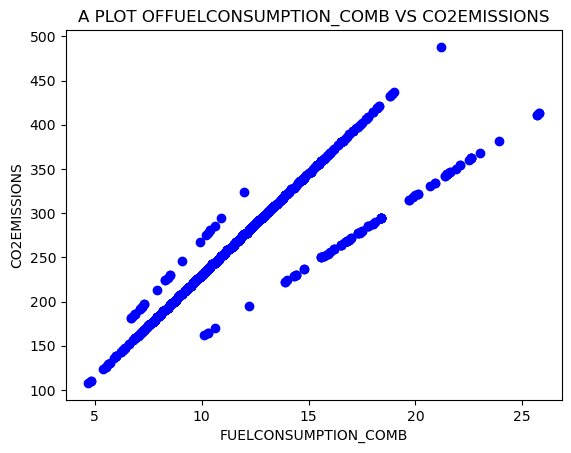

In [62]:
plt.scatter(dfc.FUELCONSUMPTION_COMB,dfc.CO2EMISSIONS, color = 'blue')
plt.title("A PLOT OFFUELCONSUMPTION_COMB VS CO2EMISSIONS")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

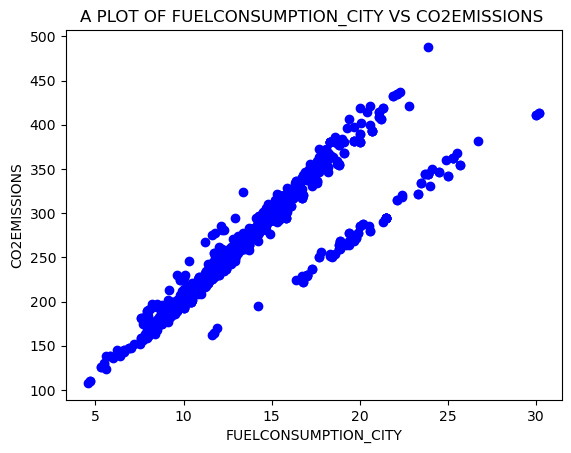

In [63]:
plt.scatter(dfc.FUELCONSUMPTION_CITY,dfc.CO2EMISSIONS, color = 'blue')
plt.title("A PLOT OF FUELCONSUMPTION_CITY VS CO2EMISSIONS ")
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show

### TRAINING THE MODEL
###### Train / Test Split the data to have train_set and test_set of data.
######   creating a  mask to select random rows using np.random.rand().

In [64]:
msk = np.random.rand(len(df)) < 0.8
train = dfc[msk]
test = dfc[~msk]


### Train data distribution

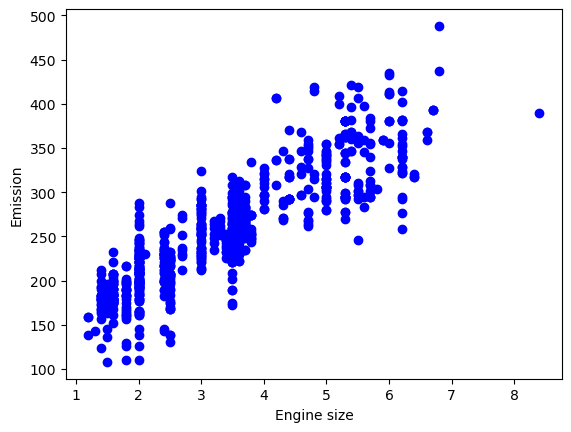

In [65]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## modelling using sklearn package 

In [66]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[39.23318874]]
Intercept: [124.30218354]


Text(0, 0.5, 'Emission')

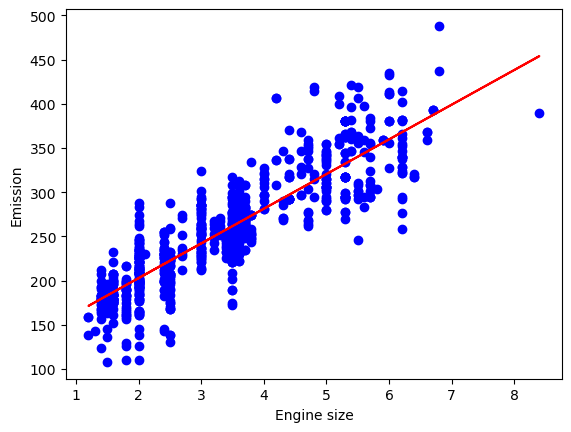

In [67]:
# viz of the model
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## MODEL EVALUATION .
##### Here the actual values is compared with the predicted values to evaluate the accuracy of the regression model. Here we are using R2 ( Root mean Squared error)

In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) 
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.22
Residual sum of squares (MSE): 939.41
R2-score: 0.76


### THANK YOU FOR YOUR TIME